### Installing Libraries

In [2]:
!pip install matplotlib
!pip install tensorflow
!pip install scikit-learn
!pip install pandas
!pip install seaborn

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew, kurtosis
import pickle

### Loading the dataset

In [4]:
pd.set_option('display.max_columns', 1000)
df = pd.read_csv("C:/Users/mayan/Downloads/smartphones_cleaned_v6.csv")### put your csv file path here ###

In [5]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12,256,6.70,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6,128,6.59,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4,64,6.60,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6,128,6.55,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6,128,6.70,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [6]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000,1075.852041,2214.663265
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000


### Exploratory Data Analysis (EDA)
#### Check for null values:

In [7]:
print(df.isnull().sum())

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64


#### Check for duplicates:

In [8]:
print(df.duplicated().sum())

0


In [9]:
X = df.drop("price", axis=1)
y = df["price"]

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

#### Impute missing values

In [10]:
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

X[numeric_features] = numeric_imputer.fit_transform(X[numeric_features])
X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

#### Checking Skewness and Kurtosis

In [11]:
numeric_df = df.select_dtypes(include=['number'])
skewness = numeric_df.apply(skew)
kurt = numeric_df.apply(kurtosis)
results = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt})
print(results)

                           Skewness   Kurtosis
price                      6.581697  78.782342
rating                          NaN        NaN
num_cores                       NaN        NaN
processor_speed                 NaN        NaN
battery_capacity                NaN        NaN
fast_charging_available   -2.005990   2.023995
fast_charging                   NaN        NaN
ram_capacity               0.744754   0.984181
internal_memory            3.824264  24.185642
screen_size               -2.112959  17.380143
refresh_rate               0.297277  -0.668257
num_rear_cameras          -0.517219   0.107987
num_front_cameras               NaN        NaN
primary_camera_rear        1.767867   6.027655
primary_camera_front            NaN        NaN
extended_memory_available -0.541242  -1.707057
extended_upto                   NaN        NaN
resolution_width           1.815600   6.383391
resolution_height         -0.692977   0.989572


### Data Visualization
#### Visualize the distribution of prices:

C:\Users\mayan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


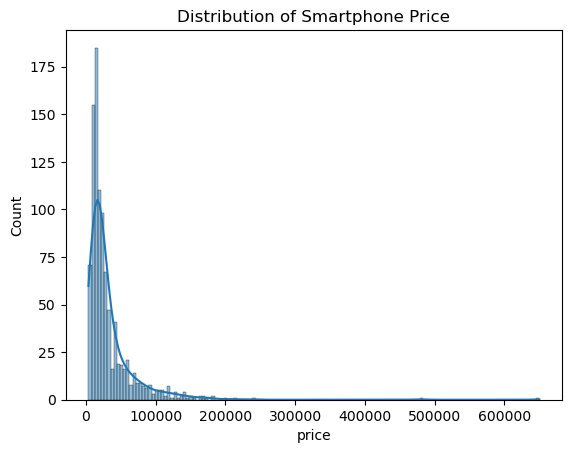

In [12]:
sns.histplot(df["price"], kde=True)
plt.title("Distribution of Smartphone Price")
plt.show()

C:\Users\mayan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mayan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mayan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mayan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

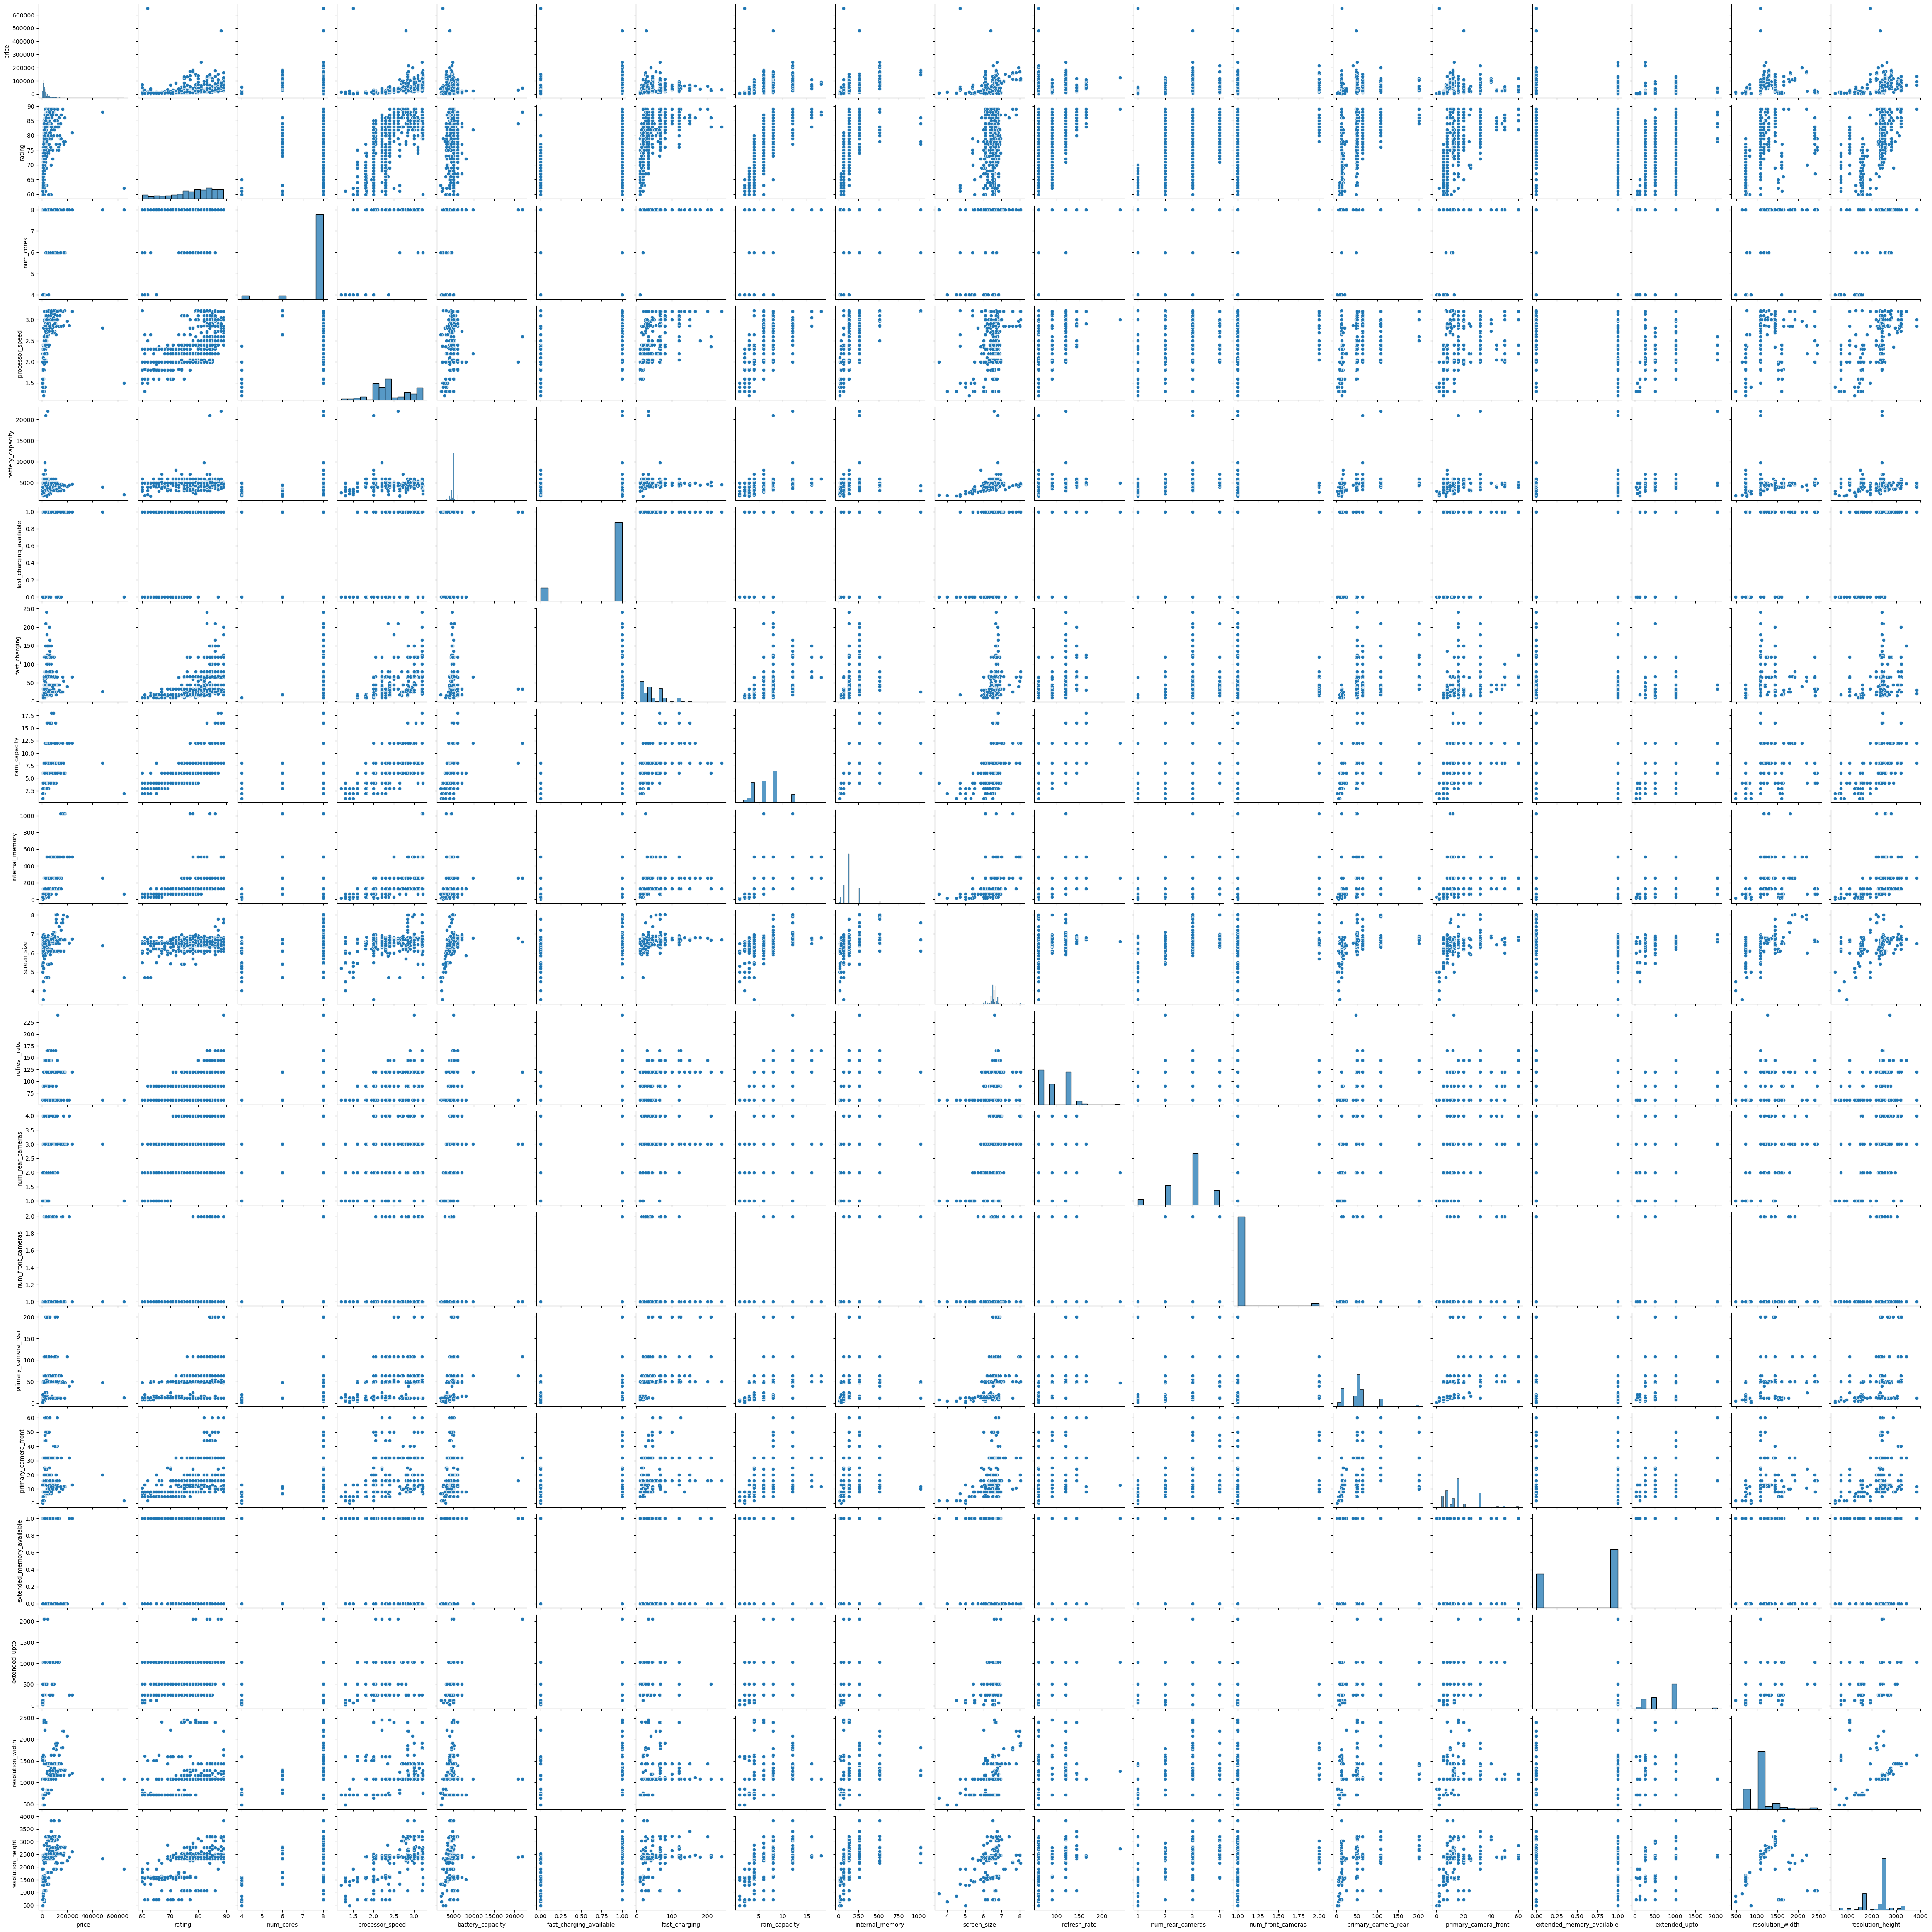

In [13]:
sns.pairplot(numeric_df)
plt.show()

### Insights from the Pair Plot

1. **Correlation Between Price and Rating**:
   - There is a positive correlation between the price of smartphones and their ratings. Generally, higher-priced smartphones tend to have higher ratings.

2. **5G and NFC Features**:
   - Smartphones with 5G capability and NFC support are often found in higher price ranges and tend to have better ratings compared to those without these features.

3. **Processor Specifications**:
   - The number of cores and processor speed show a positive correlation with the price. Smartphones with higher processor speeds and more cores are typically more expensive and have better ratings.

4. **Camera Specifications**:
   - The number of rear and front cameras, as well as their megapixel counts, positively correlate with the price and rating. Higher camera specifications often result in higher-priced and better-rated smartphones.

5. **Screen Resolution and Refresh Rate**:
   - Higher screen resolution and refresh rates are associated with higher prices and ratings. Smartphones with better display features tend to be more expensive and receive higher user ratings.

6. **Operating System**:
   - Most smartphones in the dataset use the Android operating system. There is no significant variation in price or rating based solely on the operating system.

7. **Memory and Storage**:
   - Extended memory availability and higher resolution dimensions (both width and height) are common in higher-priced smartphones. These features also tend to contribute to better user ratings.

### Detailed Observations

1. **Brand Impact**:
   - Specific brands may have a tendency to cluster within certain price ranges and ratings. For instance, premium brands like OnePlus and Samsung often occupy higher price and rating segments.

2. **Outliers**:
   - Identify any outliers in the dataset, such as exceptionally high-priced smartphones with low ratings or low-priced smartphones with high ratings. Investigate potential reasons for these anomalies.

3. **Feature Combinations**:
   - Certain feature combinations (e.g., high processor speed, multiple high-resolution cameras, and large screen sizes) are typical of premium smartphones. These combinations generally result in higher prices and ratings.

#### Boxplots for Numeric Features

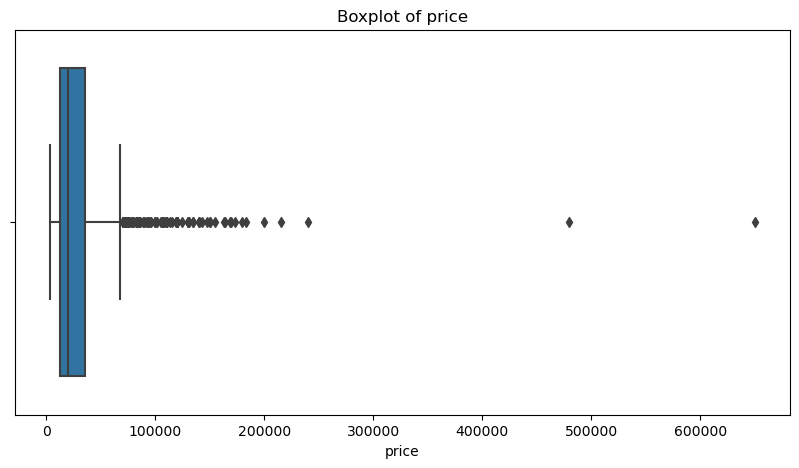

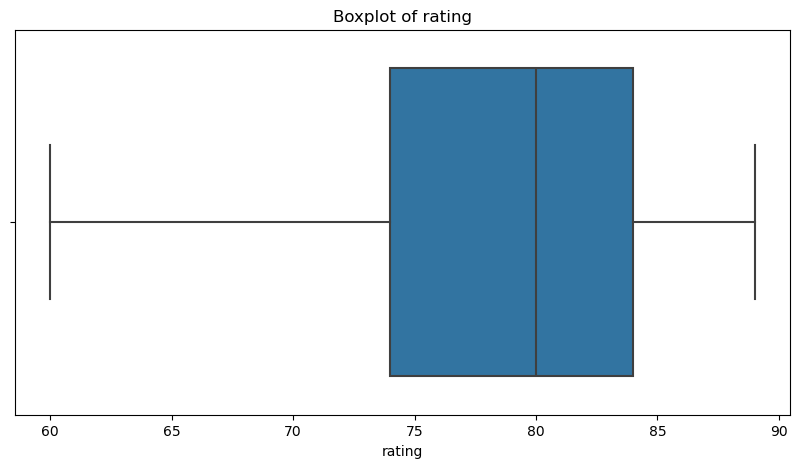

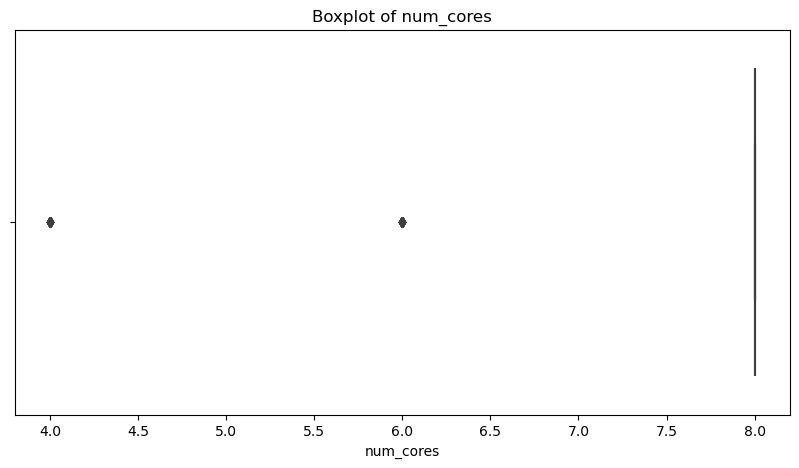

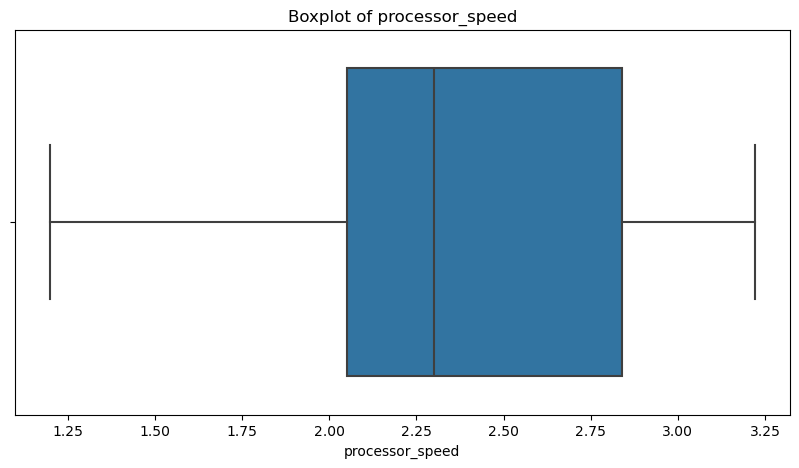

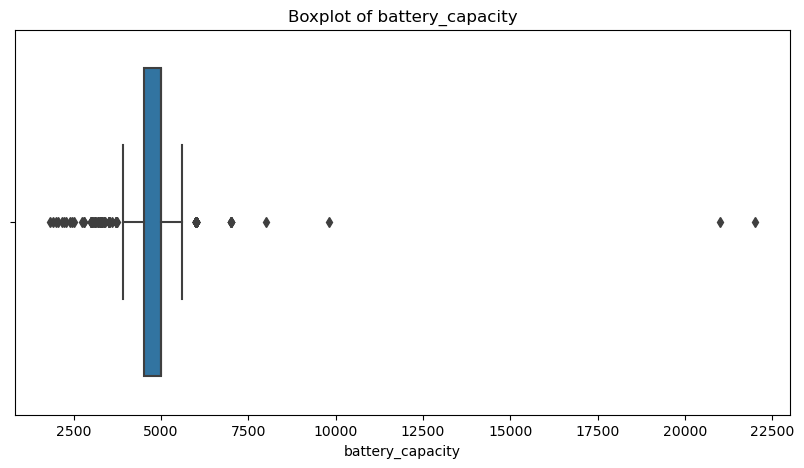

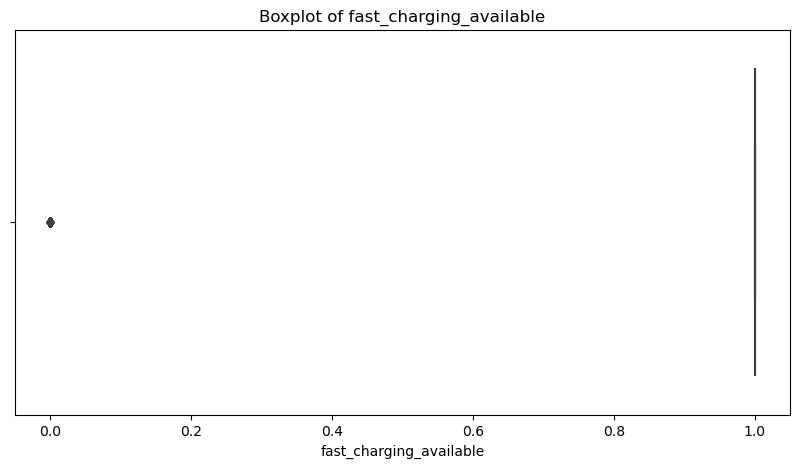

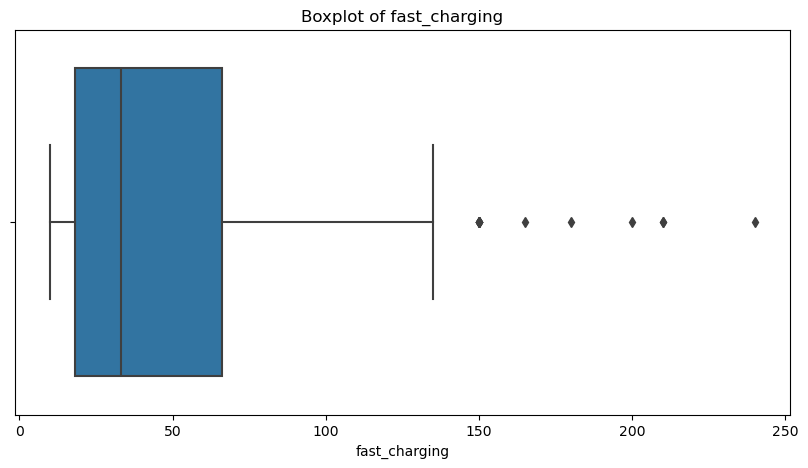

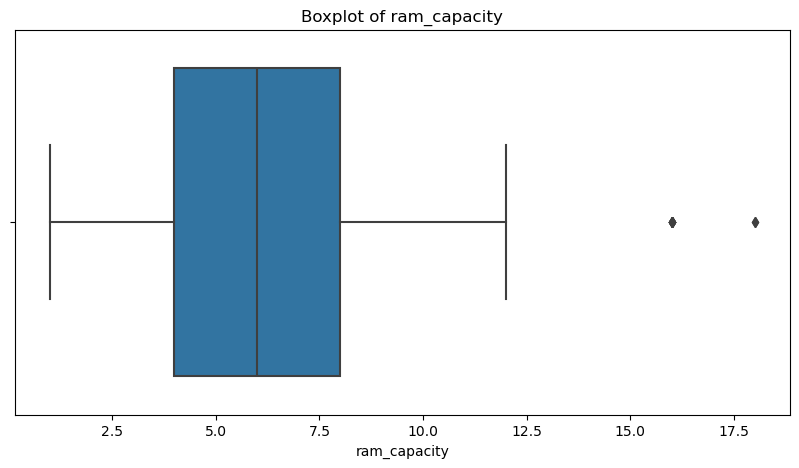

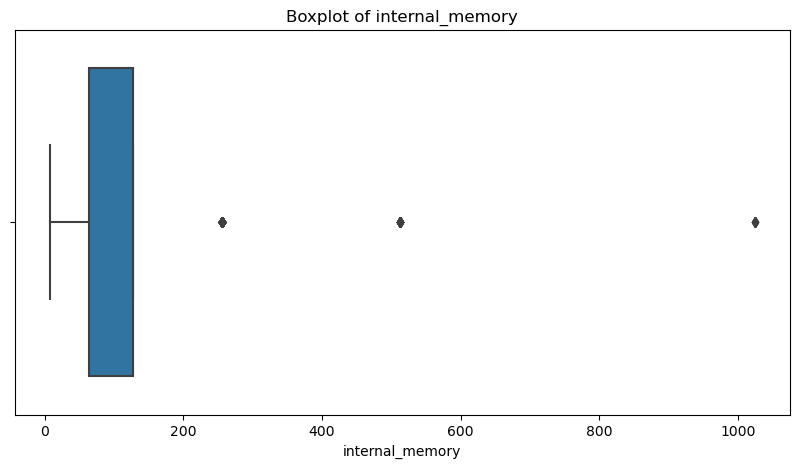

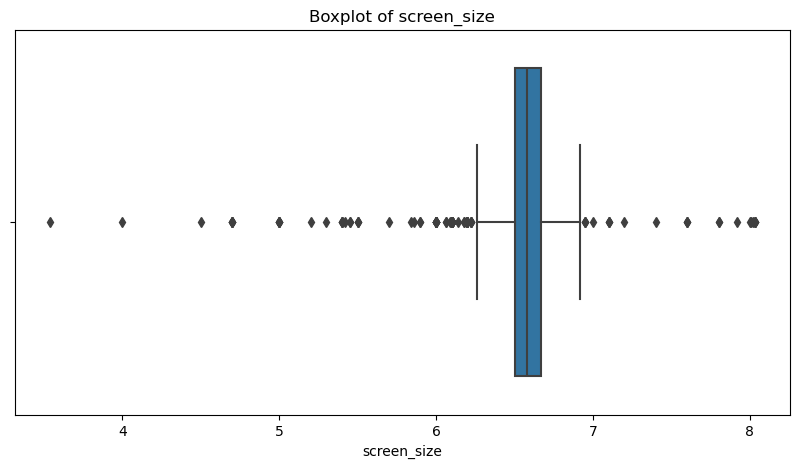

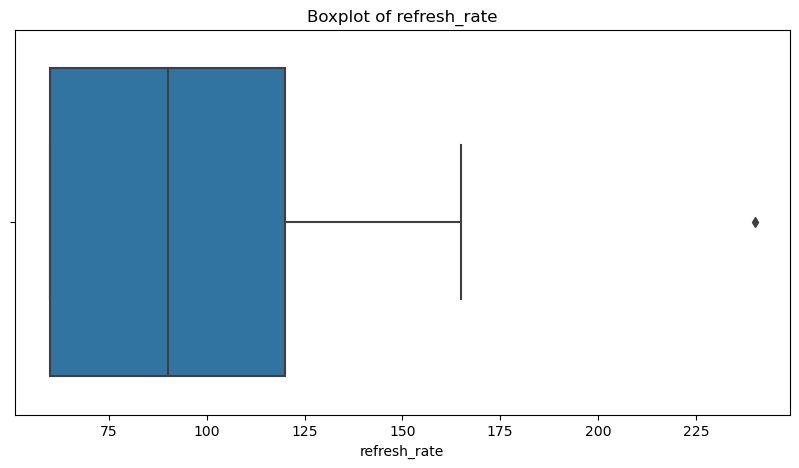

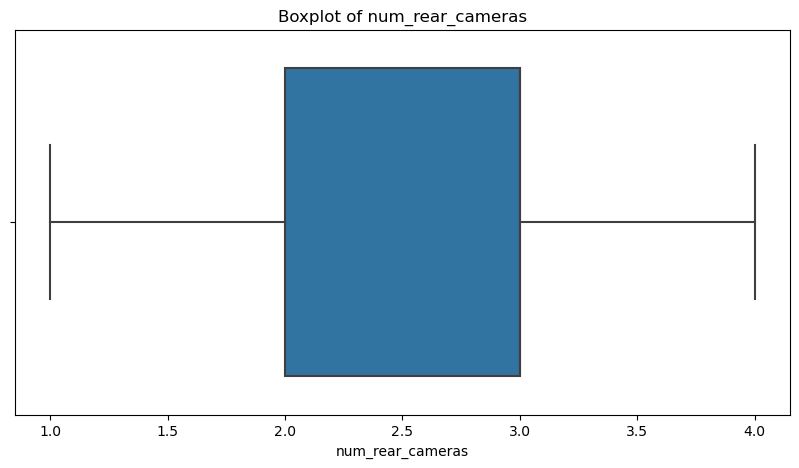

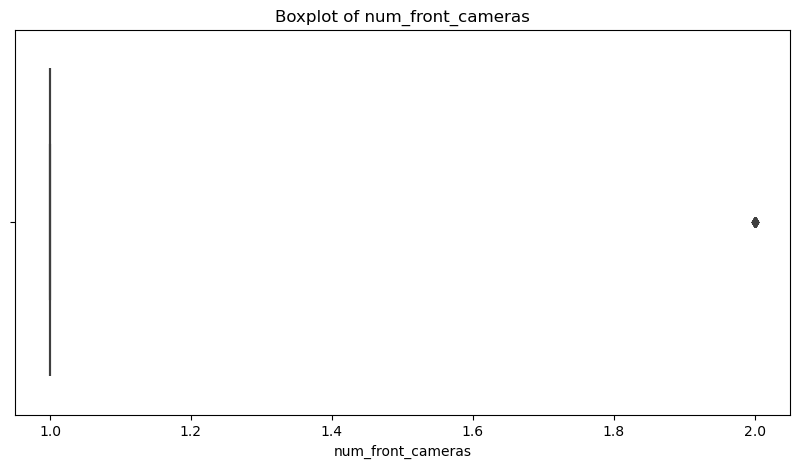

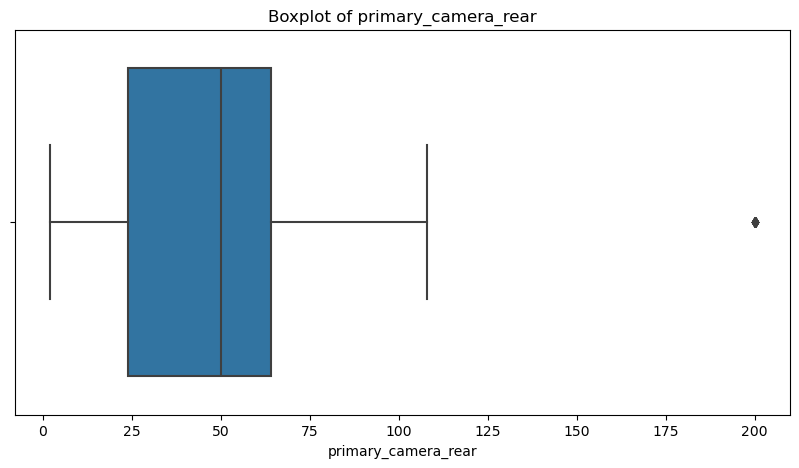

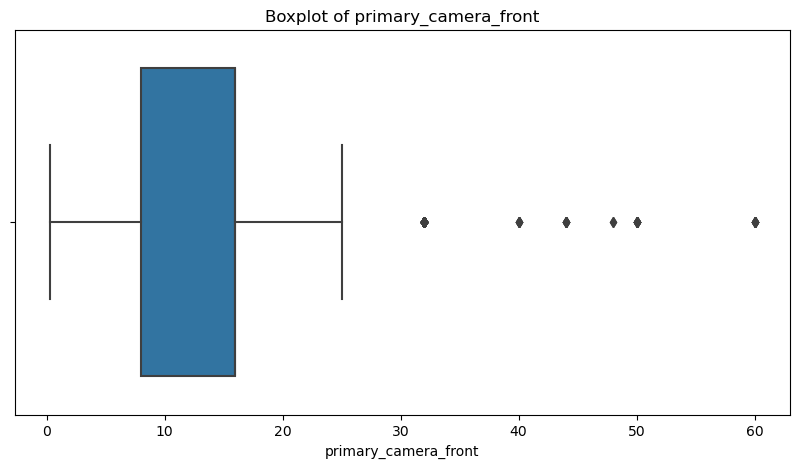

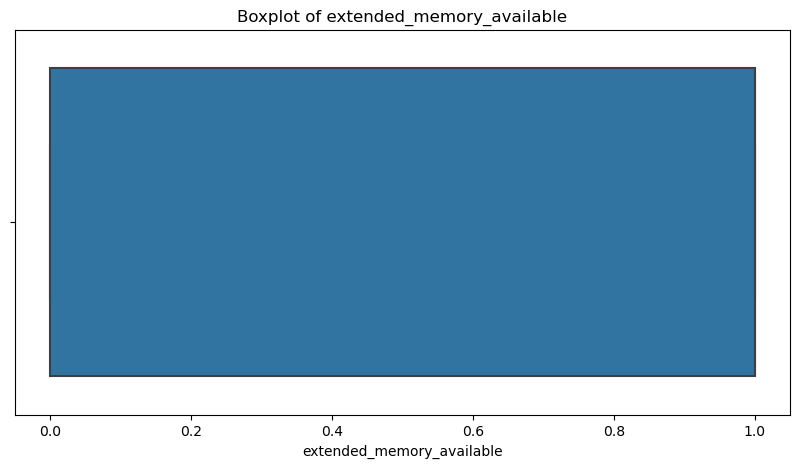

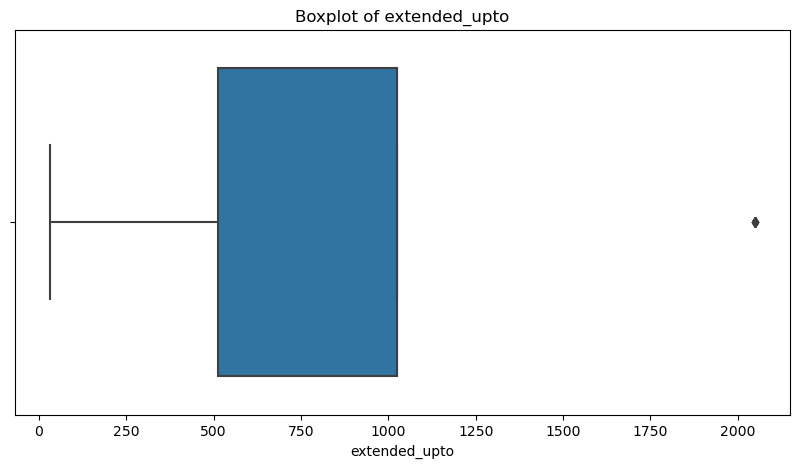

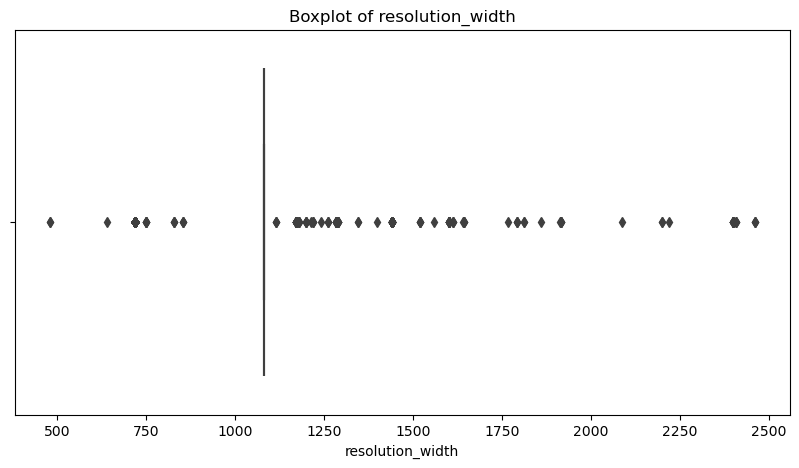

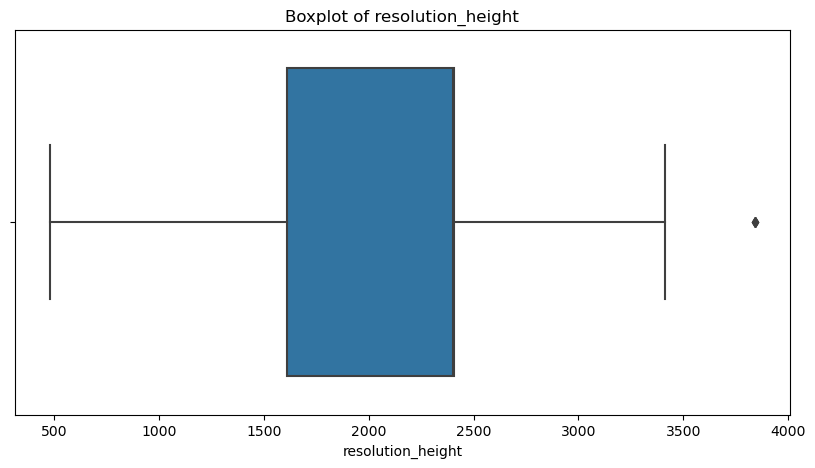

In [14]:
for column in numeric_df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=numeric_df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

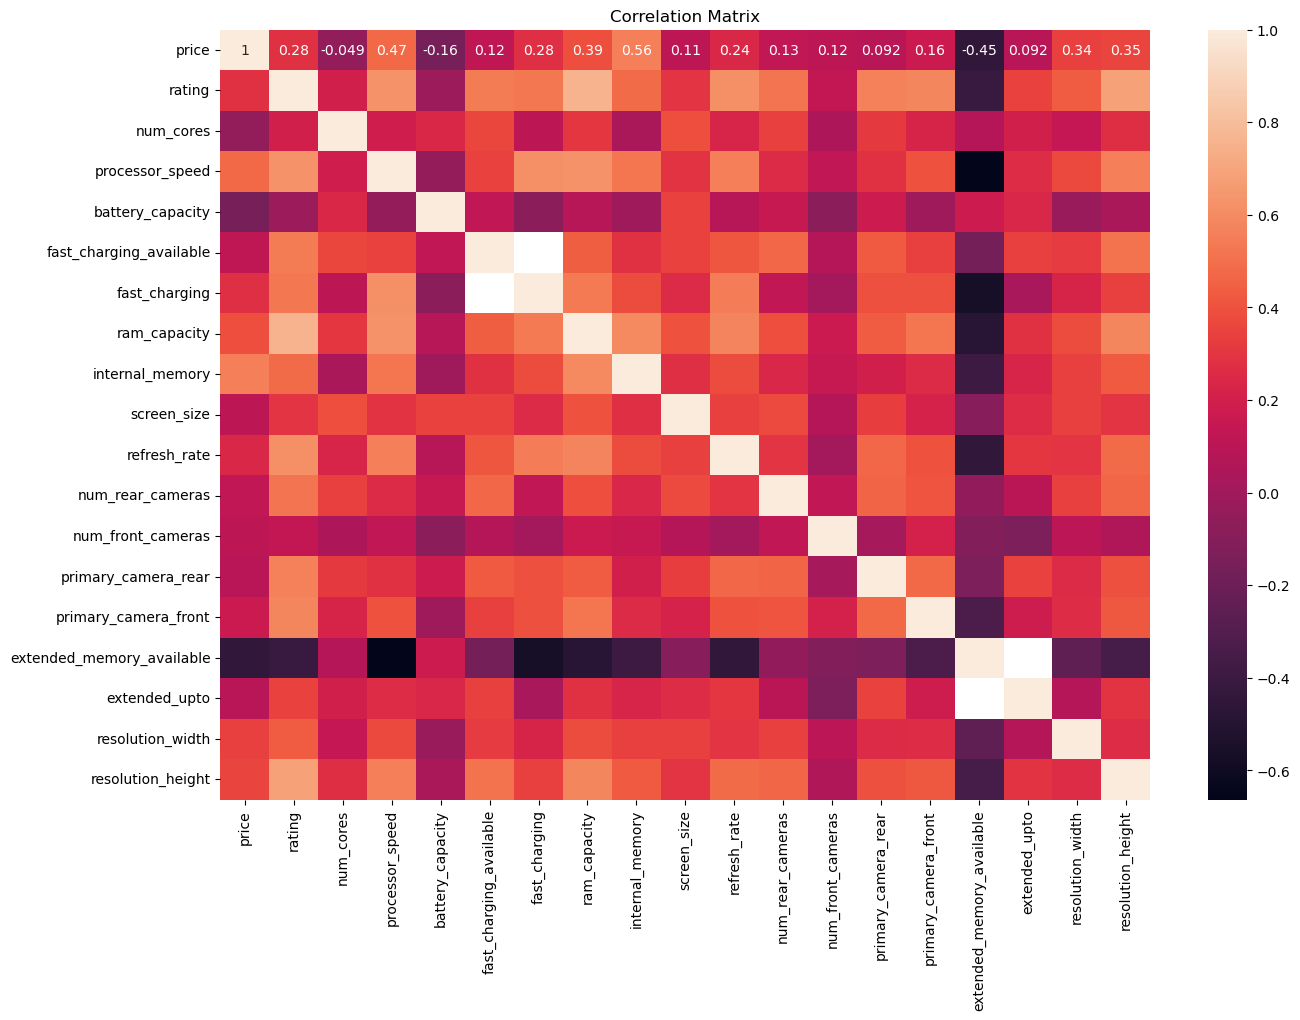

In [15]:
plt.figure(figsize=(15, 10))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

### Insights from the Correlation Matrix

1. **Price Correlations**:
   - **Processor Speed (0.56)**: There is a moderate positive correlation between the price and processor speed, indicating that more expensive smartphones tend to have faster processors.
   - **Internal Memory (0.39)**: Internal memory shows a moderate positive correlation with price, suggesting that higher-priced smartphones generally offer more internal storage.
   - **RAM Capacity (0.28)**: There is a weak to moderate positive correlation between RAM capacity and price.
   - **Screen Size (0.24)**: Screen size has a weak positive correlation with price.
   - **Refresh Rate (0.34)**: A moderate positive correlation exists between refresh rate and price, meaning higher-priced smartphones often have higher refresh rates.
   - **Number of Rear Cameras (0.13)**: There is a weak positive correlation between the number of rear cameras and price.
   - **Primary Rear Camera Resolution (0.12)**: The primary rear camera resolution has a weak positive correlation with price.
   - **Resolution Width (0.35) and Height (0.34)**: Both resolution width and height show moderate positive correlations with price, indicating higher-priced smartphones tend to have higher screen resolutions.

2. **Rating Correlations**:
   - **Processor Speed (0.11)**: There is a weak positive correlation between rating and processor speed.
   - **Battery Capacity (-0.16)**: Interestingly, there is a weak negative correlation between rating and battery capacity, suggesting that higher battery capacity does not necessarily result in better ratings.
   - **Screen Size (0.12)**: Screen size shows a weak positive correlation with rating.
   - **Number of Rear Cameras (0.13)**: There is a weak positive correlation between the number of rear cameras and rating.
   - **Primary Rear Camera Resolution (0.11)**: A weak positive correlation exists between the primary rear camera resolution and rating.

3. **Other Notable Correlations**:
   - **Internal Memory and RAM Capacity (0.62)**: There is a strong positive correlation between internal memory and RAM capacity, indicating that smartphones with more internal storage typically also have more RAM.
   - **Resolution Width and Height (0.96)**: As expected, resolution width and height are highly correlated.
   - **Primary Rear Camera Resolution and Number of Rear Cameras (0.24)**: There is a weak to moderate positive correlation between the primary rear camera resolution and the number of rear cameras.

### Summary

The correlation matrix reveals several key relationships among the features of smartphones:

- **Price**: Strongly correlated with processor speed, internal memory, RAM capacity, refresh rate, and screen resolution. These features significantly influence the cost of a smartphone.
- **Rating**: Shows weaker correlations with various features, suggesting that user ratings are influenced by a broader range of factors beyond just hardware specifications.
- **Memory and Storage**: Internal memory and RAM capacity are highly correlated, indicating that these features often scale together in smartphones.
- **Display**: Screen resolution (width and height) are highly correlated and also moderately correlated with price, reflecting the impact of display quality on smartphone cost.

### Feature Engineering

In [16]:
df["has_5g"] = df["has_5g"].astype(int)
df["has_nfc"] = df["has_nfc"].astype(int)
df["has_ir_blaster"] = df["has_ir_blaster"].astype(int)

### Prepare the Data for Modeling

#### Split the data into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### One-hot encode categorical features

In [18]:
if len(categorical_features) > 0:
    onehot_encoder = OneHotEncoder(handle_unknown='ignore')
    onehot_encoder.fit(X_train[categorical_features])

    X_train_onehot = pd.DataFrame(onehot_encoder.transform(X_train[categorical_features]).toarray(),
                                  columns=onehot_encoder.get_feature_names_out(categorical_features))
    X_test_onehot = pd.DataFrame(onehot_encoder.transform(X_test[categorical_features]).toarray(),
                                 columns=onehot_encoder.get_feature_names_out(categorical_features))

    X_train = pd.concat(
        [X_train.select_dtypes(exclude=['object']).reset_index(drop=True), X_train_onehot.reset_index(drop=True)],
        axis=1)
    X_test = pd.concat(
        [X_test.select_dtypes(exclude=['object']).reset_index(drop=True), X_test_onehot.reset_index(drop=True)], axis=1)
else:
    print("No categorical features found. Skipping one-hot encoding.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (784, 867)
X_test shape: (196, 867)
y_train shape: (784,)
y_test shape: (196,)


### Define preprocessing for numerical features

In [19]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#### Define preprocessing for entire dataset

In [20]:
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

### Define the function to calculate RMSPE

In [21]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

### Model Training and Evaluation
#### Linear Regression

In [22]:
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_rmspe = rmspe(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression RMSPE:", lr_rmspe)
print("Linear Regression R^2:", lr_r2)

Linear Regression RMSPE: 15828.078855586376
Linear Regression R^2: 0.7384441837736497


#### Random Forest Regression

In [23]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmspe = rmspe(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regression RMSPE:", rf_rmspe)
print("Random Forest Regression R^2:", rf_r2)

Random Forest Regression RMSPE: 10208.114562937848
Random Forest Regression R^2: 0.8912074786124116


#### Support Vector Regression

In [24]:
svr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='linear'))
])
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_rmspe = rmspe(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("Support Vector Regression RMSPE:", svr_rmspe)
print("Support Vector Regression R^2:", svr_r2)

Support Vector Regression RMSPE: 30445.61987632703
Support Vector Regression R^2: 0.032262405192726384


#### Artificial Neural Network (ANN)

In [25]:
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=1))
ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
ann_pred = ann_model.predict(X_test).flatten()
ann_rmspe = rmspe(y_test, ann_pred)
ann_r2 = r2_score(y_test, ann_pred)

print("Artificial Neural Network RMSPE:", ann_rmspe)
print("Artificial Neural Network R^2:", ann_r2)

Epoch 1/100


C:\Users\mayan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2596856576.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2378375424.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2269669888.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1646200448.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1232621440.0000  
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1281357568.0000 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1657486848.0000 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2859081728.0000   
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2206245376.0000
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1456717312.0000 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2059454592.0000 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1560572288.0000  
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1219947136.0000
Epoch 14/100
25/25 ━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1299522944.0000
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1002148544.0000
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 558996608.0000  
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 975821632.0000 
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1418465152.0000
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1182016512.0000
Epoch 81/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 593404032.0000  
Epoch 82/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1229699584.0000 
Epoch 83/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2129779840.0000   
Epoch 84/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2125246720.0000
Epoch 85/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 613281216.0000  
Epoch 86/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1134468096.0000 
Epoch 87/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 539026816.0000 
Epoch 88/100
25/2

### Comparing the results

In [26]:
models = [
    ('Linear Regression', lr_rmspe),
    ('Random Forest Regression', rf_rmspe),
    ('Support Vector Regression', svr_rmspe),
    ('Artificial Neural Network', ann_rmspe)
]

sorted_models = sorted(models, key=lambda x: x[1])

print("Model Comparison:")
for model, rmspe in sorted_models:
    print(f"{model}: {rmspe:.2f}")

Model Comparison:
Random Forest Regression: 10208.11
Linear Regression: 15828.08
Artificial Neural Network: 16817.70
Support Vector Regression: 30445.62


### Visualization
#### Visualize the best model

In [27]:
best_model = sorted_models[0][0]

if best_model == 'Linear Regression':
    best_pred = lr_pred
elif best_model == 'Random Forest Regression':
    best_pred = rf_pred
elif best_model == 'Support Vector Regression':
    best_pred = svr_pred
elif best_model == 'Artificial Neural Network':
    best_pred = ann_pred

#### Scatter plot of Actual vs Predicted prices

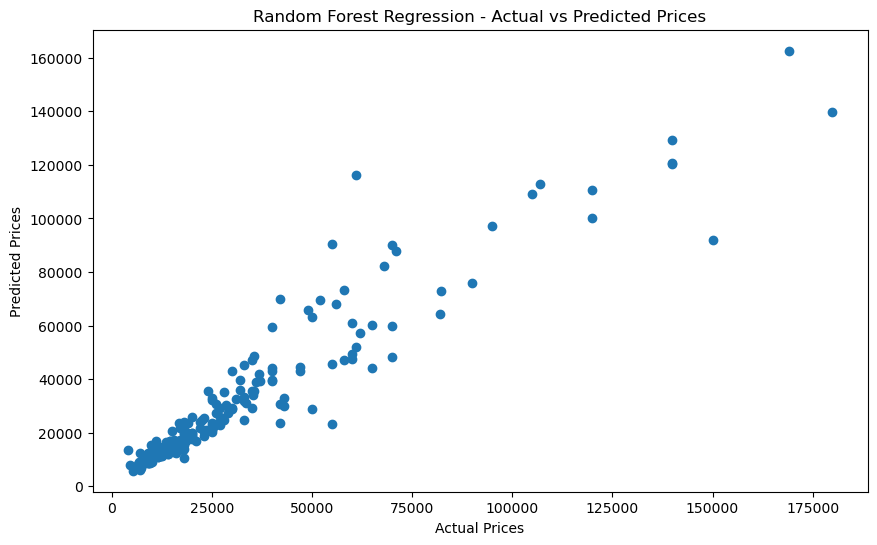

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"{best_model} - Actual vs Predicted Prices")
plt.show()

#### Line plot of Actual vs Predicted prices

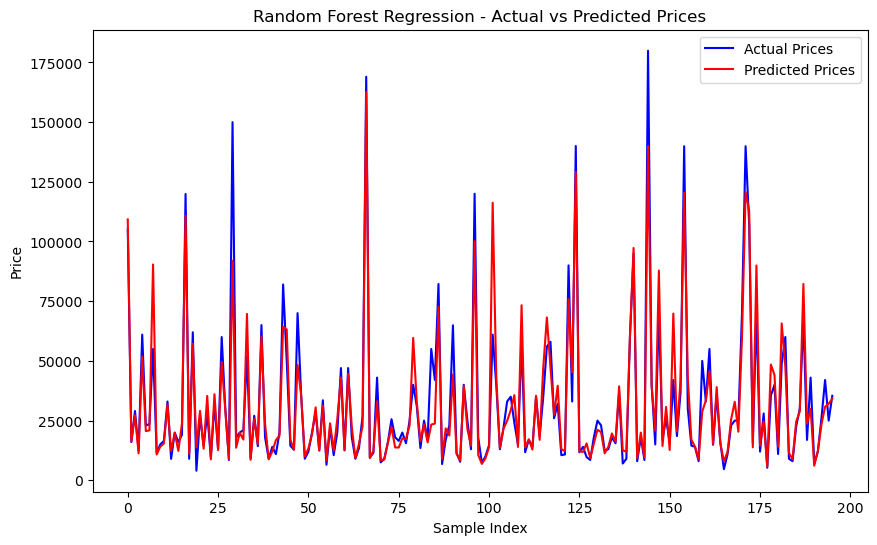

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label="Actual Prices", color='blue')
plt.plot(best_pred, label="Predicted Prices", color='red')
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title(f"{best_model} - Actual vs Predicted Prices")
plt.legend()
plt.show()

#### Residual plot

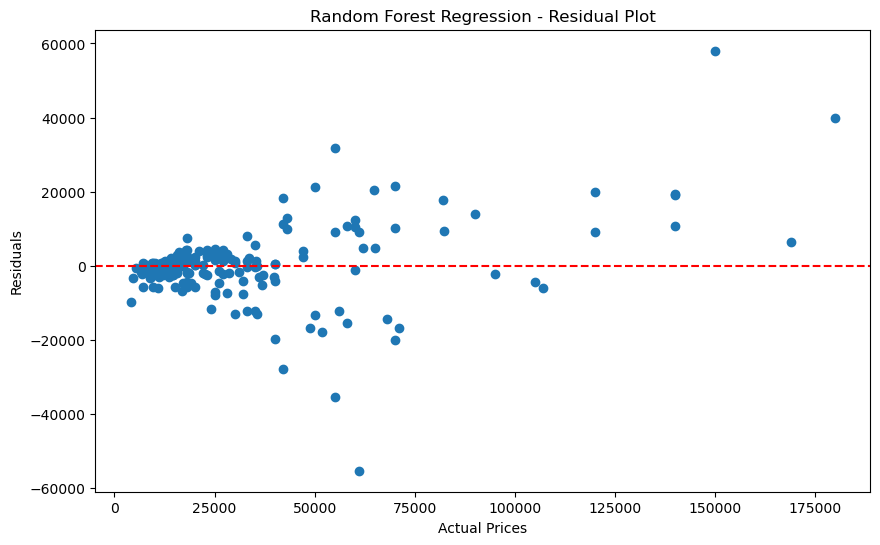

In [30]:
residuals = y_test - best_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title(f"{best_model} - Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()